**Introduction**

The idiosyncratic nature of culture and government lends itself to environmental disparities, none more pressing than that of CO2 emissions (CO2E). However, to the best of our knowledge, a comprehensive analysis of the relationship between these regional characteristics and CO2E has yet to be completed. Our paper attempts to address one facet of this topic, specifically the role of freedom, whether that be cultural or governmental freedoms, on CO2E. 


In this study, we aim to answer the question:
> **Can you predict CO2 emissions using the freedom index for each country?**


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# Import packages

from IPython.display import clear_output

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = None
pd.options.display.max_rows = None

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [ ]:
# Import and view Human Freedom Indices dataset
df_freedom = pd.read_csv('/gdrive/Shareddrives/Hackathon/data/HFI2021.csv')
df_freedom.head()

,year,countries,ISO,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances_torture,pf_ss_killings,pf_ss_disappearances,pf_ss,pf_movement_vdem_foreign,pf_movement_vdem_men,pf_movement_vdem_women,pf_movement_vdem,pf_movement_cld,pf_movement,pf_religion_suppression,pf_religion_freedom_vdem,pf_religion_freedom_cld,pf_religion_freedom,pf_religion,pf_assembly_entry,pf_assembly_freedom_house,pf_assembly_freedom_bti,pf_assembly_freedom_cld,pf_assembly_freedom,pf_assembly_parties_barriers,pf_assembly_parties_bans,pf_assembly_parties_auton,pf_assembly_parties,pf_assembly_civil,pf_assembly,pf_assembly_rank,pf_expression_killed,pf_expression_jailed,pf_expression_media,pf_expression_cultural,pf_expression_gov,pf_expression_internet,pf_expression_harass,pf_expression_selfcens,pf_expression_freedom_bti,pf_expression_freedom_cld,pf_expression_freedom,pf_expression,pf_expression_rank,pf_identity_same_m,pf_identity_same_f,pf_identity_same,pf_identity_divorce,pf_identity_fgm,pf_identity_inheritance_widows,pf_identity_inheritance_daughters,pf_identity_inheritance,pf_identity,pf_score,pf_rank,pf_womens,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government_soa,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_regulatory,ef_legal_police,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2019,Albania,ALB,Eastern Europe,8.14,43.0,2.0,5.97,4.76,4.26,5.00,9.33,10.0,10.00,7.5,10.00,10.00,8.28,9.72,9.36,9.34,9.51,9.85,9.86,9.74,10.0,9.87,9.84,9.27,10.0,9.64,9.74,8.40,10.0,10.0,10.0,10.00,9.20,9.53,8.60,9.11,8.71,9.05,41,10.0,10.00,5.0,7.34,4.53,8.51,4.89,5.95,7.0,5.0,6.00,6.91,89,10.0,10.0,10.0,7.5,10.0,NaN,NaN,7.5,8.75,8.38,45.0,8.97,8.16,7.33,8.00,9.0,7.0,8.0,8.54,8.00,4.13,4.26,3.84,8.33,5.27,3.91,6.72,5.61,5.26,9.99,9.75,9.72,10.0,9.86,9.66,9.28,8.10,9.01,6.81,9.41,8.11,10.00,4.17,4.62,8.63,5.80,8.23,10.0,8.60,10.0,9.53,5.57,4.87,5.58,8.0,6.30,10.0,6.72,5.65,6.67,9.74,6.24,5.62,7.18,6.85,7.70,7.81,31.0
1,2019,Algeria,DZA,Middle East & North Africa,5.26,154.0,4.0,5.21,5.64,4.35,5.07,9.60,10.0,10.00,5.0,10.00,10.00,6.40,6.65,8.29,8.95,7.03,9.65,8.88,8.52,5.0,6.76,5.15,3.98,7.5,5.74,5.45,3.16,5.0,5.0,5.0,5.00,6.45,7.65,6.12,6.74,4.09,4.75,135,10.0,6.53,2.5,5.18,2.13,5.11,4.93,4.59,5.0,5.0,5.00,5.11,130,0.0,0.0,0.0,0.0,10.0,NaN,NaN,0.0,2.50,5.51,141.0,3.78,3.52,7.82,4.61,7.0,2.0,4.5,2.63,4.62,4.16,4.49,5.13,3.33,4.37,4.39,6.63,6.35,4.14,6.84,7.93,9.61,5.0,7.34,8.48,6.22,5.92,6.87,4.56,0.48,2.52,0.00,1.65,0.00,0.77,0.81,2.55,0.0,8.57,10.0,6.19,5.57,5.03,6.52,6.0,7.76,3.0,5.65,4.22,2.22,9.31,2.58,8.77,7.03,5.69,5.84,4.90,162.0
2,2019,Angola,AGO,Sub-Saharan Africa,6.09,129.0,4.0,2.72,4.43,3.60,3.58,8.59,10.0,9.57,7.5,9.74,9.97,4.30,7.28,8.34,8.46,7.54,9.41,8.77,8.57,7.5,8.03,6.86,6.56,7.5,7.03,6.95,3.67,5.0,5.0

According to the *Cato Institute*:

> "The Human Freedom Index presents the state of human freedom in the world based on a broad measure that encompasses personal, civil, and economic freedom. Human freedom is a social concept that recognizes the dignity of individuals and is defined here as negative liberty or the absence of coercive constraint. Because freedom is inherently valuable and plays a role in human progress, it is worth measuring carefully. The Human Freedom Index is a resource that can help to more objectively observe relationships between freedom and other social and economic phenomena, as well as the ways in which the various dimensions of freedom interact with one another."

We will be using this datset and the information it provides on government and human freedom to predict CO2 emissions.

In [ ]:
# import and view climate change dataset
df_climate = pd.read_csv('/gdrive/Shareddrives/Hackathon/data/CO2_Emissions_1960-2018.csv')
df_climate.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,204.631696,208.837879,226.081890,214.785217,207.626699,185.213644,172.158729,210.819017,194.917536,253.544574,281.962316,243.862101,234.851226,258.849924,233.492788,168.740161,360.853233,189.163403,161.806329,170.105949,174.694594,165.121266,182.270961,92.363156,228.392242,266.483562,2.868274,7.234613,10.027328,10.634558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,1.033908,1.052204,1.079727,1.104632,1.123261,1.219593,1.209263,1.204523,1.186045,1.181139,1.190203,1.182218,1.169158,1.216901,1.235911,1.319764,1.367397,1.386367,1.431964,1.423145,1.420777,1.390142,1.407205,1.357144,1.017505,0.971324,0.931920,0.925465,0.918612,0.946475,0.951132,0.971563,0.969680,0.908374,0.900399,0.971981,0.975749,1.009963,1.057182,1.032998,1.023646,1.045968,1.086449,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541
2,Afghanistan,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123409,0.115142,0.086510,0.149651,0.165208,0.129996,0.135367,0.154503,0.167612,0.153558,0.181522,0.161894,0.167066,0.131783,0.150615,0.163104,0.201224,0.231961,0.293957,0.267772,0.269230,0.246823,0.233882,0.238473,0.206030,0.098719,0.085986,0.076131,0.069020,0.062588,0.056827,0.053197,0.040653,0.037055,0.037488,0.048671,0.057008,0.045700,0.063927,0.073393,0.087083,0.158356,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151
3,Africa Western and Central,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,0.193676,0.189305,0.143989,0.202129,0.302643,0.392109,0.459993,0.538522,0.635966,0.514018,0.550024,0.516337,0.508536,0.648273,0.634541,0.604714,0.599649,0.539567,0.581373,0.583495,0.543988,0.474906,0.534962,0.414090,0.440470,0.474868,0.516677,0.518952,0.492858,0.487495,0.507633,0.488416,0.461622,0.453549,0.447244,0.474140,0.474875,0.474592,0.474318,0.509458,0.487953,0.475148,0.475025,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544
4,Angola,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,0.268937,0.172096,0.289702,0.480199,0.608224,0.564505,0.721198,0.751203,0.720750,0.628569,0.451346,0.469216,0.694731,0.683059,0.640966,0.611133,0.519353,0.551348,0.520983,0.471903,0.451619,0.544085,0.463508,0.437295,0.534250,0.533109,0.503264,0.527723,0.495418,0.773026,0.792321,0.788753,0.740254,0.797259,0.754476,0.761843,0.777423,0.993848,1.028354,0.937037,1.009434,1.123635,1.155993,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380


This CO2 emissions dataset from the World Bank contains the CO2 emissions by metric tons per capita for the years 1960-2018. 

In [ ]:
# Checking years for analysis
print(df_freedom['year'].unique())
df_freedom = df_freedom[df_freedom['year'] != 2019]
new_columns = ['Country Name', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008']
df_climate = df_climate[new_columns]
print(df_climate.columns)

[2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008]
Index(['Country Name', '2018', '2017', '2016', '2015', '2014', '2013', '2012',
       '2011', '2010', '2009', '2008'],
      dtype='object')


In [ ]:
# Countries in climate dataset
df_climate['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Alge

In [ ]:
# Countries in Human Freedom index dataset
df_freedom['countries'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'Hong Kong SAR, China', 'Hungary',
       'Iceland', 'India', 'I

In [ ]:
# Have both datsets use the same countries for merging
countries_not_found = list(set(df_climate['Country Name'].unique())-set(df_freedom['countries'].unique())) 
df_climate = df_climate[~df_climate['Country Name'].isin(countries_not_found)]
df_freedom = df_freedom[df_freedom['countries'] != 'Taiwan']

# Reset index
df_climate.reset_index() 
df_freedom.reset_index()

# Changing column name
df_climate = df_climate.rename(columns={'Country Name':'country'})
df_freedom = df_freedom.rename(columns={'countries':'country'})

# Merging

In order to carry out the analyses, we merged the two datasets by year and country name. 

In [ ]:
# Creating the new co2 column values for the df_freedom dataframe
l = []
for index, row in df_freedom.iterrows():
  country = row['country']
  year = row['year']
  value = float(df_climate[df_climate['country'] == country][str(year)])
  l.append(value)

df_freedom['co2'] = l

In [ ]:
# Exporting new dataframe to new csv file
df_freedom.to_csv('merged_co2_freedom.csv', index=False)

# Descriptive Statistics

Our analysis integrates indices from the CATO Institutes’ Human Freedom Index with the World Bank’s CO2 emissions by Country dataset. The indicators we analyzed were high-level indices that portrays the different kinds of freedom in various sectors for each country. 

> * Overall Human Freedom (hf_score) is the aggregate index for the entire dataset, and was included to examine how the general freedom of a nation and its people may influence CO2E:
* Rule of Law (pf_rol)is a measurement of the degree to which laws are enforced within a nation, and ensures that all those of a nation are treated equally under law. This index was included to explore if the enforcement of personal regulations is a prerequisite for low CO2E.
* Safety and Security (pf_ss)intuitively measures the safety and security of a nation’s citizens. Research suggests that individuals who feel unsafe/insecure are less likely to concern themselves with environmental efforts.
* Civil Society Repression (pf_assembly_civil) is a measure of a nation’s oppression of civil organization/assembly. We included this index to explore if repression of environmental protesting and assembly of environmental groups would increase CO2E.
* Association, Assembly, & Civil Society (pf_assembly)
* Expression and Information (pf_expression) is a measure of freedom of expression and transmissibility of information within a Nation. We included this measure to clarify if accessibility to verified environmental information would reduce CO2E.
* Freedom of Academic and Cultural Expression (pf_expression_cultural) measures the freedom of academic and cultural expression within a nation. We included this measure to explore how the permeability of academic efforts to combat climate change may reduce CO2E in a nation. 
* Internet Censorship Effort (pf_expression_internet) measures a nation’s initiative to censor information online. For similar reasons to our other inclusions, this indice was included to examine how the accessibility of environmental information influences CO2E. 
* Media Freedom (pf_expression_media) is a measure of a Country’s acceptance of consolidated media systems. We included this metric again to determine whether increased transmissibility of information improved CO2E.
* Overall Personal Freedom (pf_score) is intuitively a measure of personal freedoms. We were interested in examining if an increase in freedom to act would correspond to an increase in environmental efforts and as a result reduced CO2E.
* Size of Government (el_government) is a measure of a nation’s degree of capitalism as opposed to communism. This indice was unique in that we did not have a robust hypothesis for how it may play influence CO2E. As a preliminary thought, we considered that larger governments would face less obstructions to mass adoption of environmental efforts, thereby reducing CO2E.
* Legal System & Property Rights (el_legal) recalls the freedom of individuals when holding property and in the legal system.  
* Sound Money (ef_money) is a measure of a nation’s trust in its currency. We hypothesized that this would confounded by general economic development, and would be directly correlated with CO2E as a result. 
* Freedom to trade internationally (ef_trade) is a measure of a Country’s willingness to trade internationally. We were interested in this metric to determine if economic expedition of inefficient processes to better suited countries would occasion greater overall efficiencies, thereby reducing net production and as a result CO2E.
* Regulation score (el_regulation) indicates the overall freedom rating for government regulation.
* Business regulations (ef_regulation_business) is a measure of a country’s degree of regulation on business. We hypothesized that a norm of harsher regulation efforts would expedite the introduction of environmental regulations on business within a country, thereby reducing CO2E.
* Overall Economic Freedom (ef_score) is a measure of general economic freedom. We were interested in clarifying if relatively restricted economies have an easier time adopting environmental regulations than relatively unrestricted economies, thereby reducing CO2E.


The values for these indices range from 0-10, where 10 indicates greater human freedom. 

**In this section, we visualize the data with charts and graphs constructed with Seaborn package in Python.**

In [ ]:
# Import new dataframe
df = pd.read_csv('merged_co2_freedom.csv')

# Grab columns for analysis
needed_cols = ['co2', 'year', 'country', 
               'hf_score', 'pf_rol', 'pf_ss', 'pf_assembly_civil', 'pf_assembly', 'pf_expression', 'pf_expression_cultural', 'pf_expression_internet', 'pf_expression_media', 
               'pf_score', 'ef_government', 'ef_legal', 'ef_money', 'ef_trade', 'ef_regulation_business', 'ef_regulation', 'ef_score']
df = df[needed_cols]
df.head(5)             

,co2,year,country,hf_score,pf_rol,pf_ss,pf_assembly_civil,pf_assembly,pf_expression,pf_expression_cultural,pf_expression_internet,pf_expression_media,pf_score,ef_government,ef_legal,ef_money,ef_trade,ef_regulation_business,ef_regulation,ef_score
0,1.939732,2018,Albania,8.16,5.00,9.52,8.71,8.97,7.15,7.42,8.51,5.0,8.43,7.88,5.22,9.82,8.22,6.85,7.77,7.78
1,3.591657,2018,Algeria,5.21,5.07,8.79,3.87,4.59,5.62,5.84,6.66,2.5,5.48,4.56,4.24,7.22,2.55,5.97,5.57,4.83
2,0.887380,2018,Angola,5.80,3.58,8.49,5.01,5.58,6.58,4.53,8.88,2.5,6.48,7.50,3.50,4.78,2.92,5.59,5.59,4.86
3,3.987234,2018,Argentina,7.57,5.71,8.44,8.22,9.03,8.45,9.43,9.90,7.5,8.77,6.22,4.82,5.04,7.48,6.29,5.83,5.88
4,1.880246,2018,Armenia,8.01,4.95,9.38,8.22,7.98,7.21,7.71,9.75,5.0,8.06,7.83,6.13,9.56,8.46,7.21,7.74,7.94


In [ ]:
# Drop rows with NAN values
df = df.dropna(axis=0)
print(df.isna().sum())

# Number of rows
print(len(df))

co2                       0
year                      0
country                   0
hf_score                  0
pf_rol                    0
pf_ss                     0
pf_assembly_civil         0
pf_assembly               0
pf_expression             0
pf_expression_cultural    0
pf_expression_internet    0
pf_expression_media       0
pf_score                  0
ef_government             0
ef_legal                  0
ef_money                  0
ef_trade                  0
ef_regulation_business    0
ef_regulation             0
ef_score                  0
dtype: int64
1644


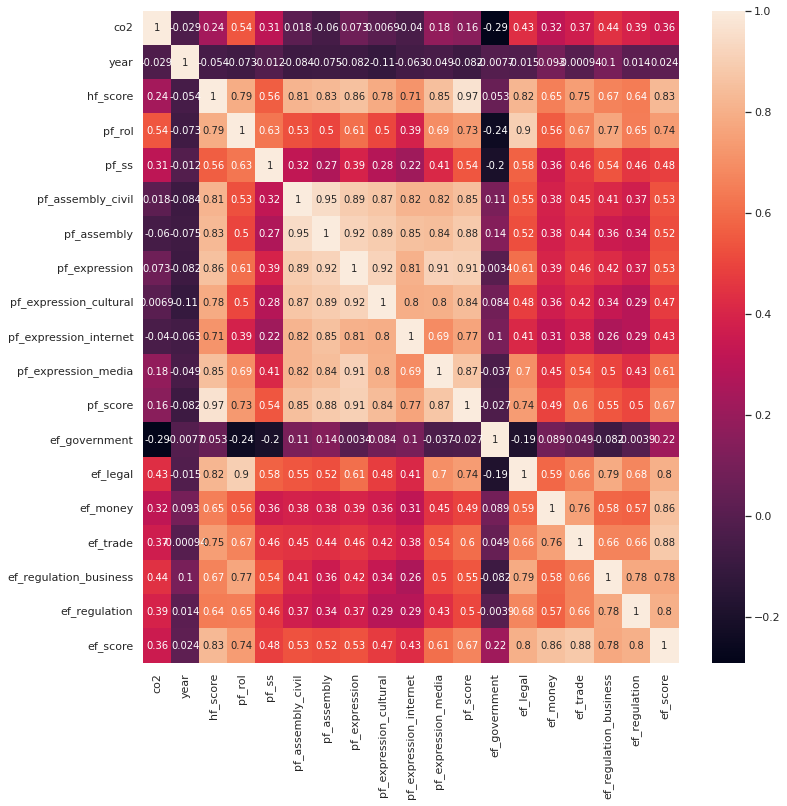

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True);

* As the size of government decreases (more human freedom), the co2 emissions decrease. 
* Strong positive correlation between pf_expression, pf_expression_media, pf_expression_internet, pf_assembly
* pf_rol and ef_government have a strong negative correlation
* Almost no relationship between pf_expression(*) and co2 emissions

In [ ]:
# CO2 emissions with other variables correlations
df.corr()['co2']

co2                       1.000000
year                     -0.028816
hf_score                  0.235414
pf_rol                    0.543191
pf_ss                     0.312567
pf_assembly_civil         0.017633
pf_assembly              -0.059596
pf_expression             0.073445
pf_expression_cultural    0.006887
pf_expression_internet   -0.040158
pf_expression_media       0.181306
pf_score                  0.155568
ef_government            -0.291954
ef_legal                  0.433235
ef_money                  0.315840
ef_trade                  0.368713
ef_regulation_business    0.442893
ef_regulation             0.394123
ef_score                  0.358565
Name: co2, dtype: float64

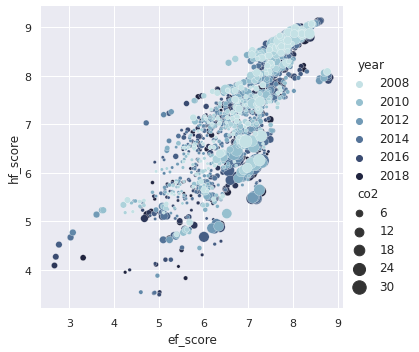

In [ ]:
# Relplot between hf_score and ef_score
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df,
    x="ef_score", y="hf_score",
    hue="year", size="co2",
    palette=cmap, sizes=(10, 200));
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)



*   Generally, there is a positive correlation between hf_score and ef_score. As both factors increase, co2 emissions also increase. 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


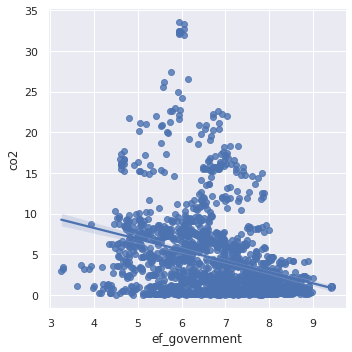

In [ ]:
sns.lmplot('ef_government', 'co2', df);

* Strong negative association between co2 emissions and ef_government.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


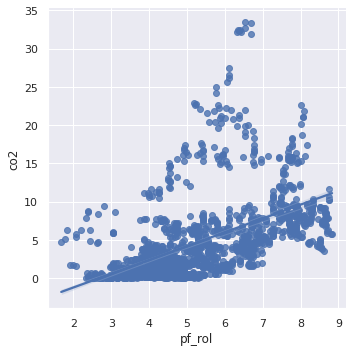

In [ ]:
sns.lmplot('pf_rol', 'co2', df);

* Strong positive association between co2 emissions and pf_rol.

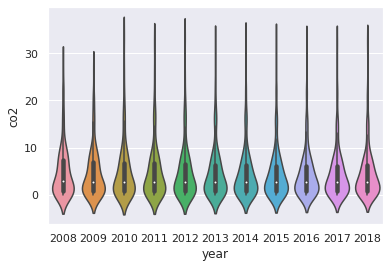

In [ ]:
sns.violinplot(x='year', y='co2', data=df);

* As years passed, there appeasrs to be no difference between global co2 emissions.

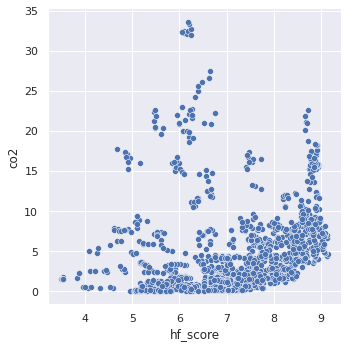

In [ ]:
sns.set(style="darkgrid")              
sns.relplot(x="hf_score", y="co2", data=df);

Slight positive correlation between co2 and hf_score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


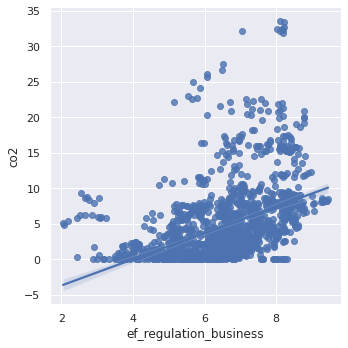

In [ ]:
sns.lmplot('ef_regulation_business', 'co2', df);

More regulation of business leads to more co2 emissions from countries.

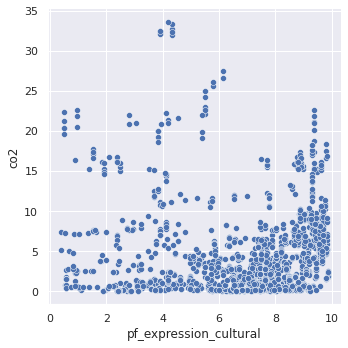

In [ ]:
sns.relplot(x="pf_expression_cultural", y="co2", data=df);

Little relationship found between cultural expression and co2

# Modeling


We test three different machine learning models to predict CO2 emissions:
* Ridge Regression
* Linear Regression
* Random Forest Regressor

To analyze the prediction ability of these models, we use the mean square error (MSE) and R-squared values. Lower MSE and higher R-squared values correlate to a higher model performance. 

In [ ]:
# Split dataset into train/test 
X = df.drop(columns=['co2', 'year', 'country'], axis=1)
y = df['co2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) # shapes of train/test datasets

(1150, 17) (1150,) (494, 17) (494,)


We decide to split the train/test datasets into 70/30

### Ridge


In [ ]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)
ridge_predicted = ridge.predict(X_test)

print("mean square error: ", mean_squared_error(y_test, ridge_predicted))
print("variance or r-squared: ", explained_variance_score(y_test, ridge_predicted))

mean square error:  17.873538509487023
variance or r-squared:  0.4240463514275198


### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predicted = lr.predict(X_test)

print("mean square error: ", mean_squared_error(y_test, lr_predicted))
print("variance or r-squared: ", explained_variance_score(y_test, lr_predicted))

mean square error:  17.87227450628719
variance or r-squared:  0.4240960809901835


### Random Forest Regressor


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=100, random_state=0)
regr.fit(X_train, y_train)
regr_predicted = regr.predict(X_test)

print("mean square error: ", mean_squared_error(y_test, regr_predicted))
print("variance or r-squared: ", explained_variance_score(y_test, regr_predicted))

mean square error:  1.6941486737269986
variance or r-squared:  0.945145643728848


**Our best performing model is the Random Forest Regressor with a MSE of 1.694 and R-squared value of 0.945**

In [ ]:
# Feature importance for RFR model prediction 
feature_importances = pd.DataFrame(regr.feature_importances_, index = X.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
pf_rol,0.402254
pf_assembly,0.211451
hf_score,0.044500
pf_assembly_civil,0.043430
pf_score,0.043189
ef_legal,0.039454
pf_ss,0.029149
pf_expression_internet,0.028766
ef_government,0.028485
ef_trade,0.027153


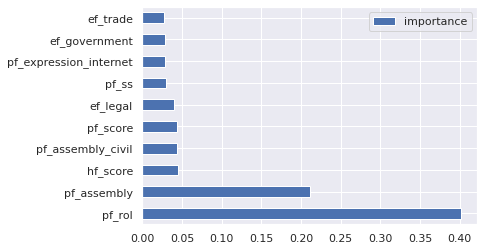

In [ ]:
feature_importances.head(10).plot(kind='barh')

pf_rol has the greatest importance for our Random Forest Regressor model when predicting co2 emissions with 94.5% accuracy (r-squared)

# Conclusions

We developed several models to predict a nation’s CO2 emissions based on their human freedom scores in various categories. Our most successful model was the Random Forest Regressor, with a mean square error of of 1.694, where 95% of the variation in CO2E is explainable by the indices we used. 

The model suggests that economic freedom is directly proportional to CO2E. As expected, most CO2 emissions have been considered externalities that come from private firms, and initiatives to curb them are often spearheaded by necessary governmental regulations that encroach on the autonomy of firms. Thus, the less control a nation’s government possesses over its economy, the more likely the nation would have relatively high levels of CO2E. 

One notable outlier of the economic indices is government size: a larger government was correlated with higher CO2E levels (29 percent of the variation in CO2E was explainable by governmental size in our model). This finding supports the notion that government inefficiencies often result in higher CO2E due to subsidies and large contracts which support and feed sectors responsible for greenhouse gas emissions. Thus, the less a government participates in its own economy, the less it is able to grow CO2 emitting industries, and the less likely it would demonstrate greater CO2E. 

In terms of personal freedom, free speech and media showed little correlation with resulting CO2E. Safety and security as well as overall human freedom scores were somewhat positively correlated with CO2E emissions. By far the strongest correlation with greater CO2E was Rule of Law, a measure of legislative enforcement. Intuitively, a citizenship which recognizes the authority of its government is more likely to follow environmental regulation imposed by that same government.       

Surprisingly, freedom of expression and information were seemingly uncorrelated with CO2E. At first glance, this seems to contradict the effort to disseminate eco-friendly environmental information. However, another way to look at this is, a country without governmental authority over the private sector will be unable to combat the most significant source of CO2E, that being private production. The spread of eco-friendly information among the public simply does seem to permeate the private sector which, above all us, is motivated by margins. 


# Limitations

The libertarian views of *Cato Institute*, who had compiled the Human Freedom Index used in this study, could have affected the data collection and freedom index for each country. 